In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import explore
import prepare
import nltk

import re



# Acquire and Prepare

Using blah blah blah

In [3]:
df = prepare.wrangle_data()

In [46]:
df = explore.feature_engineering(df)

## Feature Engineering

Using the lemmatized data we built the following descriptive features:
    1. `word_count_simple` counts the number of spaces of the lemmatized column
    2. `non_single_words` creates a list of words that appear in `all_words` more than 1 time
    3. `word_list` turns the lemmatized column into a list of words
    4. 
    5. `word_count` counts the number of elements in `word_list`
    6. 

In [20]:
df.columns[]


Index(['repo', 'language', 'readme_contents', 'stemmed', 'lemmatized',
       'word_list', 'unique_words', 'non_single_words', 'word_count_simple',
       'word_count', 'unique_count', 'non_single_count', 'percent_unique',
       'percent_repeat', 'percent_one_word', 'percent_non_single'],
      dtype='object')

In [24]:
cont_var_col_list = []
for col in df.columns:
    if df[col].dtype != 'object':
        cont_var_col_list.append(col)

cont_var_col_list

['word_count_simple',
 'word_count',
 'unique_count',
 'non_single_count',
 'percent_unique',
 'percent_repeat',
 'percent_one_word',
 'percent_non_single']

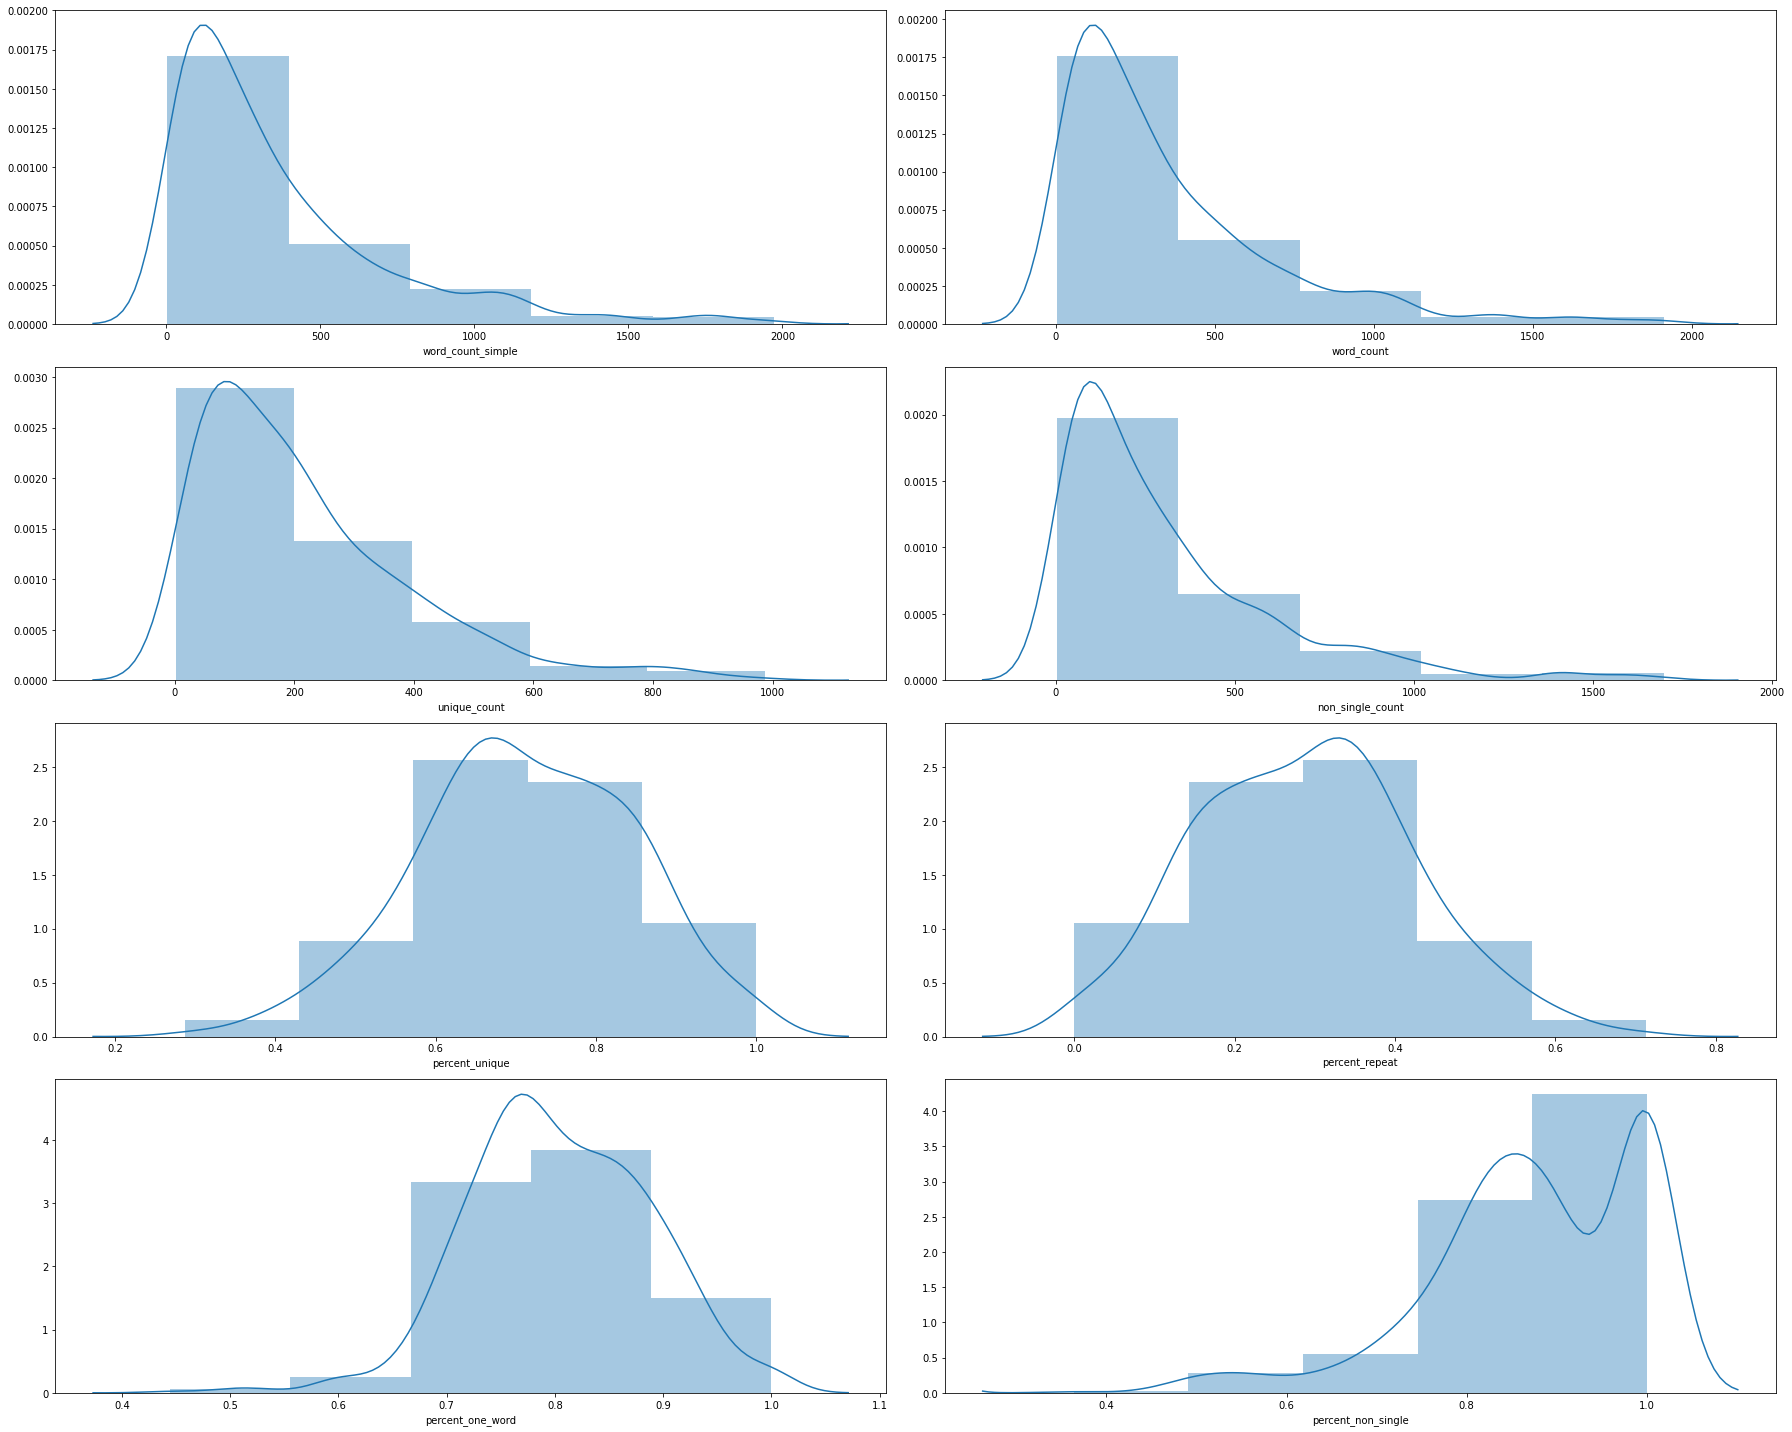

In [140]:
f = plt.figure(figsize=(25,20))
continuous_data = df_no_outliers.select_dtypes(include=["int", "float"])

for i in range(0,8):
    f.add_subplot(4,2, i+1)
    sns.distplot(continuous_data.iloc[:,i], bins=5)
plt.tight_layout()
plt.show()


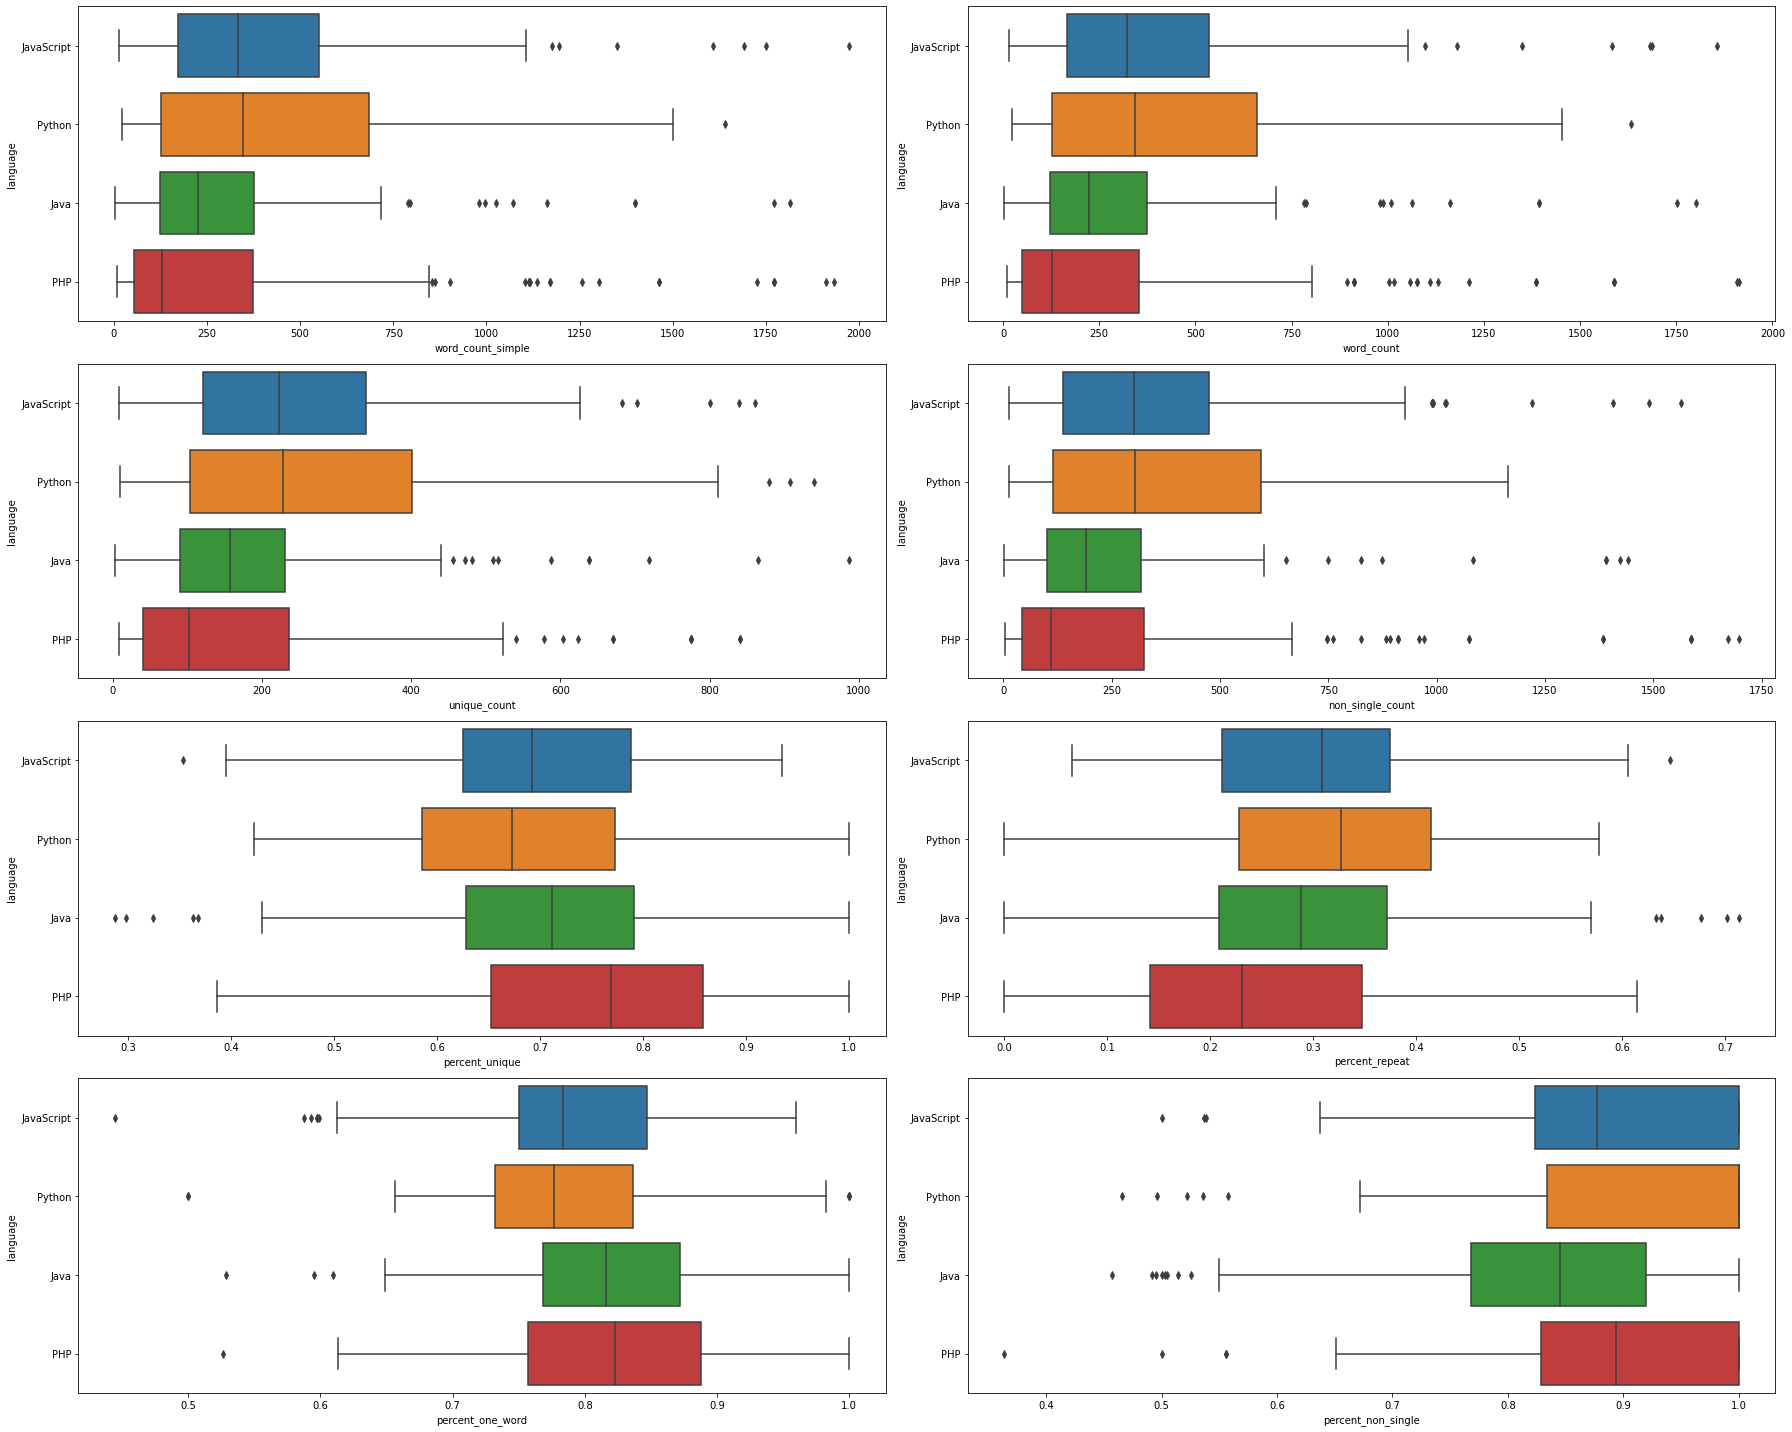

In [143]:
f = plt.figure(figsize=(25,20))
continuous_data = df_no_outliers.select_dtypes(include=["int", "float"])

for i in range(0,8):
    f.add_subplot(4,2, i+1)
    sns.boxplot(x = continuous_data.iloc[:,i], y=df_no_outliers.language)
plt.tight_layout()
plt.show()

In [26]:
s = df.word_count
k = 3

In [48]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.
    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + (k * iqr)
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [28]:
df['outlier_word_count'] = get_upper_outliers(s, k)

0          0.0
525        0.0
526        0.0
527        0.0
528        0.0
        ...   
238     5458.0
234     7073.0
184     8570.0
53      8778.0
24     13489.0
Name: outlier_word_count, Length: 800, dtype: float64

In [49]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix upper_outliers for all the numeric columns
    in the given dataframe.
    '''

    for col in df.select_dtypes('number'):
        df[col + '_upper_outliers'] = get_upper_outliers(df[col], k)

    return df

In [33]:
df = add_upper_outlier_columns(df, k)

In [58]:
def remove_outliers(df, k):
    """
    Docstring
    """
    drop_list = list(df.select_dtypes('object').columns)
    # IQR to detect and remove outliers
    Q1 = df.drop(columns=drop_list).quantile(0.25)
    Q3 = df.drop(columns=drop_list).quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df.drop(columns=drop_list) < (Q1 - k * IQR)) | (df.drop(columns=drop_list) > (Q3 + k * IQR))).any(axis=1)]
    
    df = df.drop(columns=(['outlier_word_count', 'word_count_simple_upper_outliers',
       'word_count_upper_outliers', 'unique_count_upper_outliers',
       'non_single_count_upper_outliers', 'percent_unique_upper_outliers',
       'percent_repeat_upper_outliers', 'percent_one_word_upper_outliers',
       'percent_non_single_upper_outliers',
       'outlier_word_count_upper_outliers']
        ))
    return df

In [59]:
df_no_outliers = remove_outliers(df, 3)

In [63]:
df_no_outliers.shape

(739, 16)

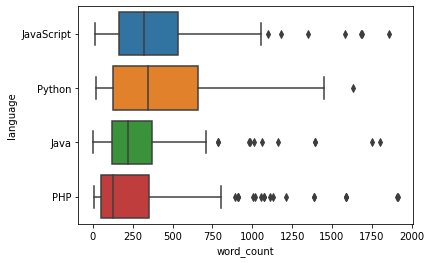

In [66]:
sns.boxplot(x = df_no_outliers.word_count, y= df_no_outliers.language)

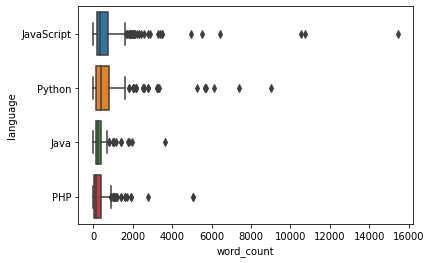

In [67]:
sns.boxplot(x = df.word_count, y= df.language)

In [124]:
df_dif = (df.groupby('language').word_count.agg(['mean', 'std']) -
          df_no_outliers.groupby('language').word_count.agg(['mean', 'std']))
df_dif = df_dif.reset_index()
df_dif

,language,mean,std
0,Java,25.242677,104.086809
1,JavaScript,463.185116,1374.033956
2,PHP,67.471429,260.241356
3,Python,400.273960,946.531211


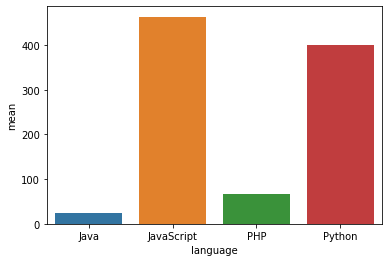

In [109]:
sns.barplot(x='language', y='mean', data=df_dif)

In [134]:
df_dif2 = (((df.groupby('language').word_count.agg(['mean', 'std']) -
          df_no_outliers.groupby('language').word_count.agg(['mean', 'std'])) /
           (df.groupby('language').word_count.agg(['mean', 'std']))))
df_dif2 = df_dif2.reset_index()

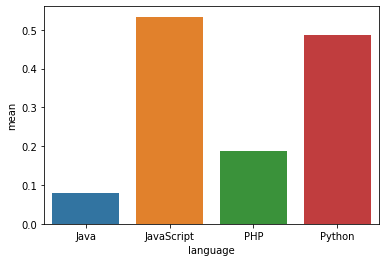

In [135]:
sns.barplot(x='language', y='mean', data=df_dif2)

# Elements of Exploration

1. Length of repository in words
2. unique words to a language
3. HTML reference tags (a, href, img)
4. repeated words

php - targetblankimg

# Manipulating dataframe and feature engineering

1. List of words from df
2. Series of list from DF

# Visualizations!!!!!

In [149]:
for i in range(0, 799):
    print(df.language[i])

JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript
JavaScript

In [179]:
py_q = pd.DataFrame({'loc_index' :df[df.lemmatized.apply(lambda x: len(re.findall(r'python', x))) > 0].index})
py_q.shape[0]

205

In [204]:
py_q[(py_q.loc_index < 200) | (py_q.loc_index >= 400)].shape[0]

41

In [183]:
df.language[200]

'Python'

In [ ]:
py_q = pd.DataFrame({'loc_index' :df[df.lemmatized.apply(lambda x: len(re.findall(r'python', x))) > 0].index})
py_q.shape[0]